# Max down hole for select elements EDA

In this notebook, we conduct further exploratory data analysis (EDA) on the values and methods for each of the selected elements for plotting maximum down hole geochemistry.

Using the cleaned single element datasets worked through in the 'SARIG_chem_load_clean' notebook, we review the distribution of the chemical data based on the mapped method (Determination) codes. Spurious data and methods are then reviewed with comments on methods to drop and data that needs either correcting in the SA Geodata database, or which should be excluded due to uncertainties on the quality of the data, either as submitted or as entered. In general, any data with an unknown method will be excluded from the datasets.

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Load and do the method mapping

In [2]:
#chem_methods = pd.read_csv(r"D:\Python ML\SA-geochemical-maps\notebooks\chem_method_code_map.csv")#, encoding='latin1')

In [3]:
#chem_methods.info()

In [4]:
#chem_methods.head()

Create the data maps

In [5]:
#determination_map = chem_methods.set_index('CHEM_METHOD')['DETERMINATION_CODE_RD'].to_dict()
#digestion_map = chem_methods.set_index('CHEM_METHOD')['DIGESTION_CODE_RD'].to_dict()
#fusion_map = chem_methods.set_index('CHEM_METHOD')['FUSION_TYPE'].to_dict()

Load cleaned single element data files

In [6]:
Au = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\Au_processed.csv')
Fe = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\Fe_processed.csv')
FeO = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\FeO_processed.csv')
Fe2O3 = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\Fe2O3_processed.csv')
Ag = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\Ag_processed.csv')
Pb = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\Pb_processed.csv')
Zn = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\Zn_processed.csv')
Ni = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\Ni_processed.csv')
Cu = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\Cu_processed.csv')
U = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\U_processed.csv')
Co = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\Co_processed.csv')
Li = pd.read_csv(r'D:\Python ML\SA-geochemical-maps\Data\Processed_2\Li_processed.csv')

eles = {'Au':Au, 'Fe':Fe, 'Ag':Ag, 'Pb':Pb, 'Zn':Zn, 'Ni':Ni, 'Cu':Cu, 'U':U, 'Co':Co, 'Li':Li}


 Apply mapping to create new method mapped cols

In [7]:
#for e in eles.values():
#    e['DETERMINATION'] = e.CHEM_METHOD_CODE.map(determination_map).fillna('unknown')
#    e['DIGESTION'] = e.CHEM_METHOD_CODE.map(digestion_map).fillna('unknown')
#    e['FUSION'] = e.CHEM_METHOD_CODE.map(fusion_map).fillna('unknown')

In [8]:
Au.head()

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
0,2071235,DC,280141.0,201.00,201.30,1629666,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,0.76,ppm,FA50/AAS,0,0.76,AAS,FA,unknown
1,2071236,DC,280141.0,201.30,202.00,1629667,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,104.33,ppm,FA50/AAS,0,104.33,AAS,FA,unknown
2,2071237,DC,280141.0,202.00,202.25,1629668,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,12.91,ppm,FA50/AAS,0,12.91,AAS,FA,unknown
3,2071238,DC,280141.0,202.25,203.00,1629669,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,0.96,ppm,FA50/AAS,0,0.96,AAS,FA,unknown
4,2071239,DC,280141.0,203.00,204.00,1629670,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,1.16,ppm,FA50/AAS,0,1.16,AAS,FA,unknown


Below is an example of Cu analyses grouped by the current lab codes. You can see there is a large number of codes and they have various distributions of chemical values. The colouring shows how these lab codes are grouped into the new higher level determination codes created by mapping the lab codes to an analysis type. Where this was not possible the determination code has been mapped as unknown.

<Figure size 432x288 with 0 Axes>

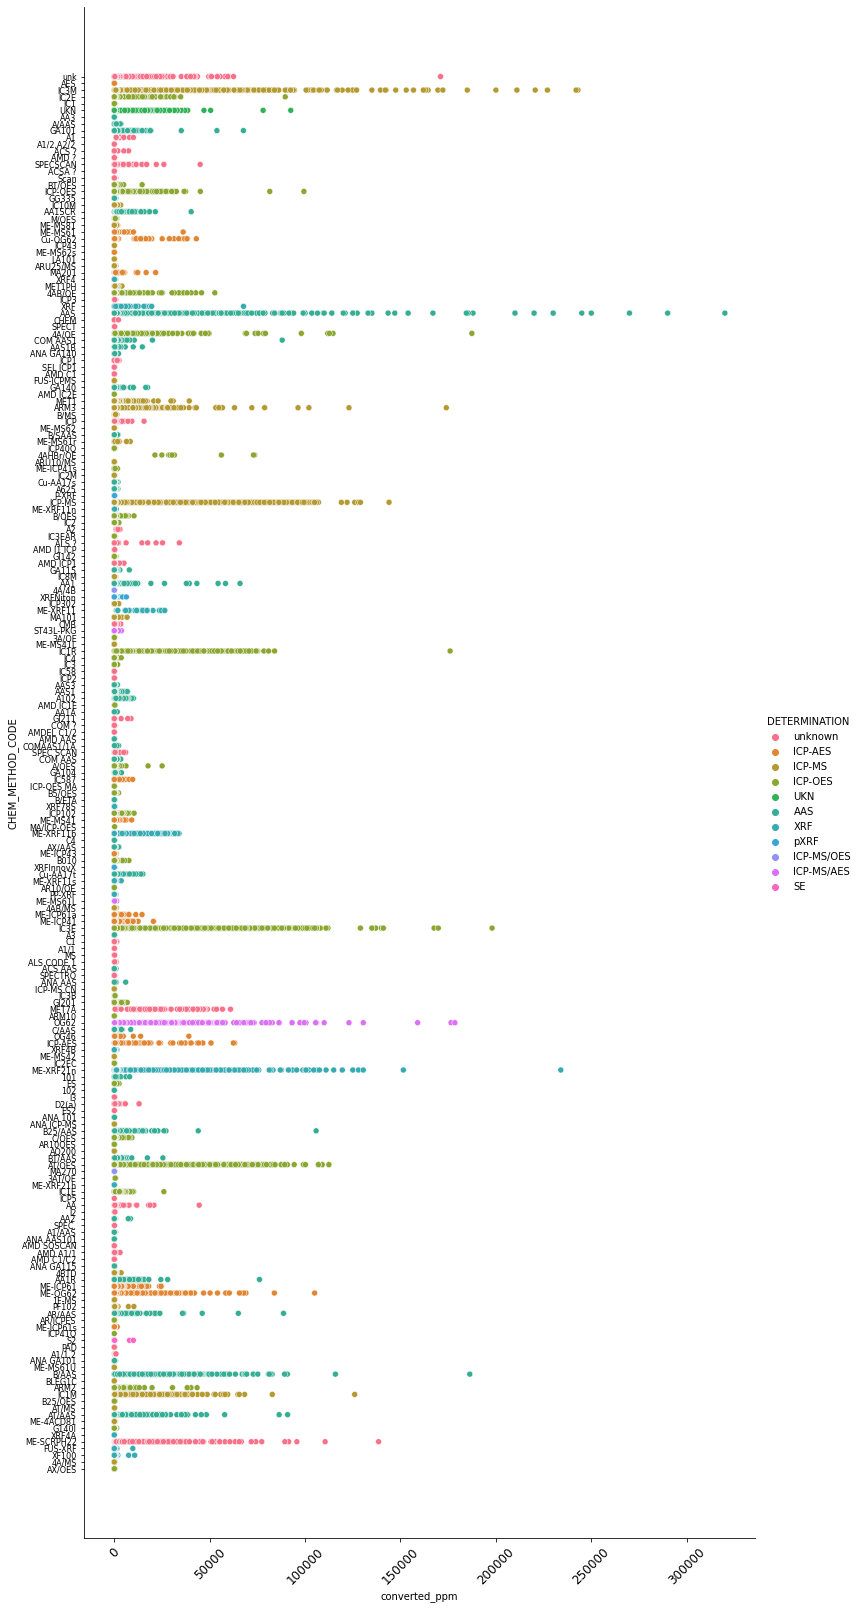

In [9]:
plt.figure()
sns.relplot(x='converted_ppm', y='CHEM_METHOD_CODE', hue='DETERMINATION', height=22, aspect=0.5, data=Cu)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=8)
plt.show()

# Each element EDA

Reviewed distribution, then checked source data for elevated or outlier values. Comments and suggestions on how to correct

## Ag

Most Ag is reported as below 50000ppm, except by method ME-MS61r, with the highest value running at 25.6% by investigator resources. Looks ok.

<Figure size 432x288 with 0 Axes>

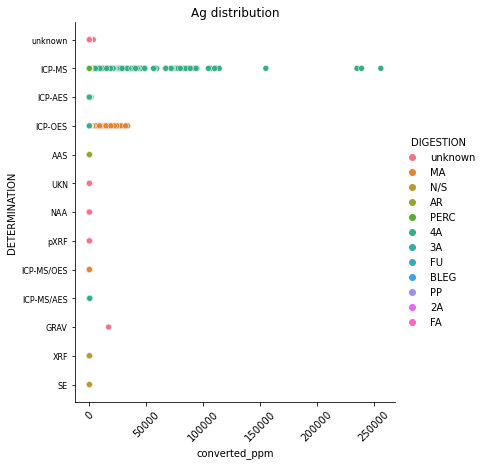

In [10]:
plt.figure()
sns.relplot(x='converted_ppm', y='DETERMINATION', hue='DIGESTION', height=6, data=Ag)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.title('Ag distribution')
plt.show()

In [11]:
Ag[Ag.converted_ppm > 150000]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
449890,2421757,CT,300659.0,39.0,42.0,1952502,GEOCHEMISTRY,"ALS Chemex, Adelaide SA",Ag,23.5,%,ME-MS61r,0,235000.0,ICP-MS,4A,unknown
449893,2421758,CT,300659.0,42.0,43.0,1952503,GEOCHEMISTRY,"ALS Chemex, Adelaide SA",Ag,25.6,%,ME-MS61r,0,256000.0,ICP-MS,4A,unknown
450420,2422124,CT,300686.0,15.0,18.0,1952869,GEOCHEMISTRY,"ALS Chemex, Adelaide SA",Ag,15.5,%,ME-MS61r,0,155000.0,ICP-MS,4A,unknown
451754,2432822,CT,301269.0,46.0,47.0,1963208,GEOCHEMISTRY,"ALS Chemex, Adelaide SA",Ag,23.9,%,ME-MS61r,0,239000.0,ICP-MS,4A,unknown


## Au

Seems to be some issue in the reported Au values coming from high detection limits. Three samples via unknown method all have 25000ppm and are BDL while others detection limits are also anomalously high and skew the results to the high end. Three in-house determinations by Dominion are also high, but not reported as BDL, 2 have values of 10000ppm while one is 3045.2, which may be real? Suggestion here is to convert BDL values to low non-zero values.

<Figure size 432x288 with 0 Axes>

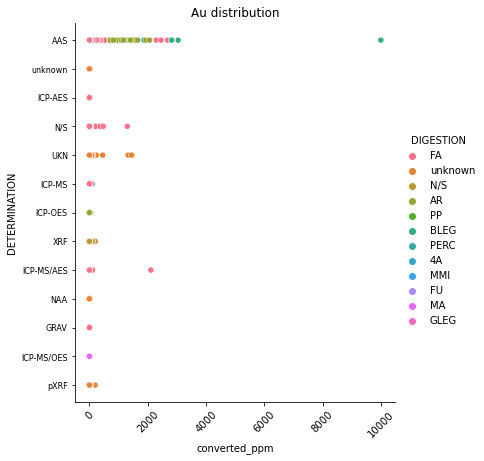

In [12]:
plt.figure()
sns.relplot(x='converted_ppm', y='DETERMINATION', hue='DIGESTION', height=6, data=Au)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.title('Au distribution')
plt.show()

In [13]:
Au[Au.converted_ppm > 3000]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
853855,1771825,DC,255693.0,88.85,89.21,1362989,GEOCHEMISTRY,In-house determinations by originating explora...,Au,10000.0,ppm,PAL,0,10000.0,AAS,BLEG,unknown
862472,1756688,DC,255573.0,96.65,96.75,1347852,GEOCHEMISTRY,In-house determinations by originating explora...,Au,3045.2,ppm,PAL,0,3045.2,AAS,BLEG,unknown
876714,1742451,CS,255197.0,6.15,6.90,1333619,GEOCHEMISTRY,In-house determinations by originating explora...,Au,10000.0,ppm,PAL,0,10000.0,AAS,BLEG,unknown


## Co

One high value is done by IC2E at amdel by Grenfell Resources on the Glenloth Granite, no real reason potentially to exclude this one.

The remainder of the very high values are done by ME-XRF11 By centrex. Each of these has Co done by both ME-XRF11 (iron ores by fusion) and ME-ICP43 (17 el AR/ICP-AES). The AES is reported in ppm while the XRF in %. There is a significant difference between the two reported values for each sample (eg sample 2333527 18ppm vs 1.98%). These all feel a bit dodge to me and should be reviewed.


<Figure size 432x288 with 0 Axes>

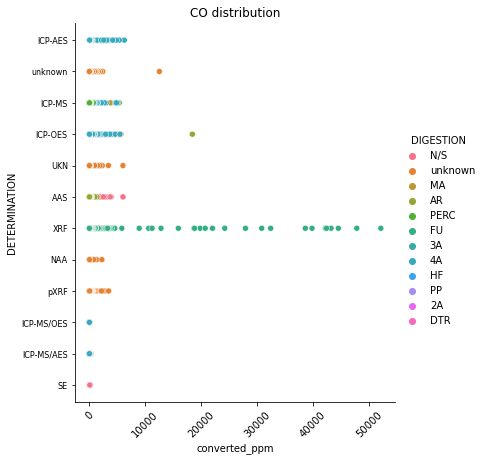

In [14]:
plt.figure()
sns.relplot(x='converted_ppm', y='DETERMINATION', hue='DIGESTION', height=6, data=Co)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.title('Co distribution')
plt.show()

In [15]:
Co[Co.converted_ppm > 15000]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
148627,662260,CT,201327.0,32.0,33.0,287286,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Co,18400.00,ppm,IC2E,0,18400.0,ICP-OES,AR,unknown
260536,2333527,CT,293981.0,18.0,22.0,1867044,GEOCHEMISTRY,"ALS Chemex, Perth WA",Co,1.98,%,ME-XRF11,0,19800.0,XRF,FU,unknown
260538,2333563,CT,293987.0,20.0,22.0,1867080,GEOCHEMISTRY,"ALS Chemex, Perth WA",Co,2.20,%,ME-XRF11,0,22000.0,XRF,FU,unknown
260539,2333568,CT,293987.0,30.0,32.0,1867085,GEOCHEMISTRY,"ALS Chemex, Perth WA",Co,2.79,%,ME-XRF11,0,27900.0,XRF,FU,unknown
260540,2333572,CT,293987.0,44.0,48.0,1867089,GEOCHEMISTRY,"ALS Chemex, Perth WA",Co,4.22,%,ME-XRF11,0,42200.0,XRF,FU,unknown
260541,2333578,CT,293988.0,32.0,36.0,1867095,GEOCHEMISTRY,"ALS Chemex, Perth WA",Co,3.08,%,ME-XRF11,0,30800.0,XRF,FU,unknown
260542,2333579,CT,293988.0,36.0,40.0,1867096,GEOCHEMISTRY,"ALS Chemex, Perth WA",Co,4.32,%,ME-XRF11,0,43200.0,XRF,FU,unknown
260543,2333580,CT,293988.0,40.0,44.0,1867097,GEOCHEMISTRY,"ALS Chemex, Perth WA",Co,4.78,%,ME-XRF11,0,47800.0,XRF,FU,unknown
260544,2333581,CT,293988.0,44.0,48.0,1867098,GEOCHEMISTRY,"ALS Chemex, Perth WA",Co,4.24,%,ME-XRF11,0,42400.0,XRF,FU,unknown
260545,2333582,CT,293988.0,48.0,52.0,1867099,GEOCHEMISTRY,"ALS Chemex, Perth WA",Co,3.98,%,ME-XRF11,0,39800.0,XRF,FU,unknown


## Ni

As above for Co, Centrex have done Ni by XRF and ICP-AES with significant discrepancies (i.e. sample 2333528 20ppm vs 53.3 %). Same issues as described above for Co

<Figure size 432x288 with 0 Axes>

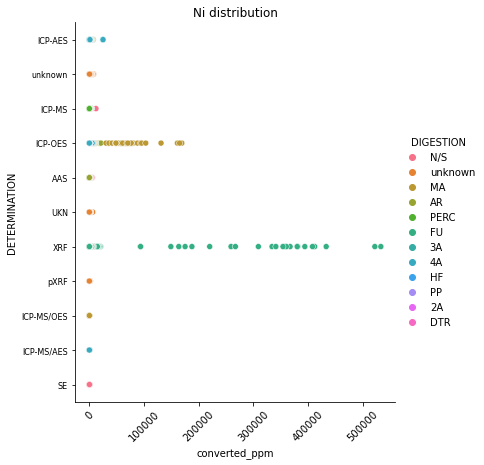

In [16]:
plt.figure()
sns.relplot(x='converted_ppm', y='DETERMINATION', hue='DIGESTION', height=6, data=Ni)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.title('Ni distribution')
plt.show()

In [17]:
Ni[Ni.converted_ppm > 400000]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
323202,2333528,CT,293981.0,22.0,26.0,1867045,GEOCHEMISTRY,"ALS Chemex, Perth WA",Ni,53.3,%,ME-XRF11,0,533000.0,XRF,FU,unknown
323205,2333572,CT,293987.0,44.0,48.0,1867089,GEOCHEMISTRY,"ALS Chemex, Perth WA",Ni,43.3,%,ME-XRF11,0,433000.0,XRF,FU,unknown
323211,2333586,CT,293989.0,15.0,20.0,1867103,GEOCHEMISTRY,"ALS Chemex, Perth WA",Ni,41.2,%,ME-XRF11,0,412000.0,XRF,FU,unknown
323212,2333587,CT,293989.0,20.0,24.0,1867104,GEOCHEMISTRY,"ALS Chemex, Perth WA",Ni,52.2,%,ME-XRF11,0,522000.0,XRF,FU,unknown
323213,2333589,CT,293989.0,28.0,32.0,1867106,GEOCHEMISTRY,"ALS Chemex, Perth WA",Ni,40.8,%,ME-XRF11,0,408000.0,XRF,FU,unknown


## Pb

There seems to be an issue with some of the Pb reporting on some samples. There are a number of samples that report values in % for methods IC1R and IC3E. All reports I can see present this data in ppm. There are 1494 samples in this data set with % units for Pb in the IC1R method, out of 44506 samples by this method. Most that I have checked have come from BHP samples so I haven't found the origional data! But many other samples by the same method, including BHP samples, are presented as ppm. I think this may be a input or reporting error.

There are also some samples by method IC3E presented as % with values up to 100%. These have come from Trafford resources. It is reported as % in the original data from the company. There are 62801 total by this method in the data set with most reported as ppm. There are 1084 reported as %, from Trafford resources. Of these there are 21 reported over 40% Pb, including one at 100%. Not sure about these data??


<Figure size 432x288 with 0 Axes>

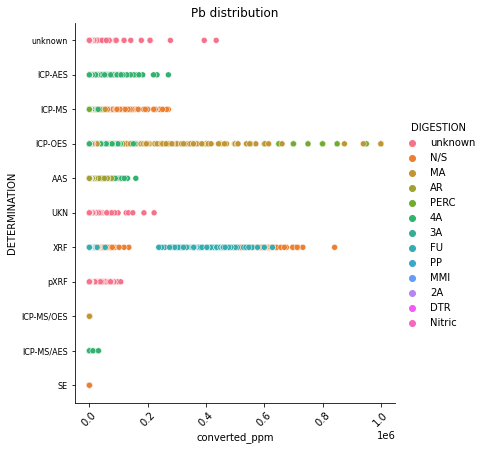

In [18]:
plt.figure()
sns.relplot(x='converted_ppm', y='DETERMINATION', hue='DIGESTION', height=6, data=Pb)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.title('Pb distribution')
plt.show()

In [19]:
Pb[Pb.converted_ppm > 800000]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
569092,2633683,DC,312946.0,606.0,607.0,2157362,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,100.00,%,IC1R,0,1000000.0,ICP-OES,PERC,unknown
569101,2633692,DC,312946.0,615.0,616.0,2157380,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,95.00,%,IC1R,0,950000.0,ICP-OES,PERC,unknown
569102,2633693,DC,312946.0,616.0,617.0,2157382,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,85.00,%,IC1R,0,850000.0,ICP-OES,PERC,unknown
569104,2633696,DC,312946.0,619.0,620.0,2157388,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,85.00,%,IC1R,0,850000.0,ICP-OES,PERC,unknown
569238,2633718,DC,312946.0,641.0,642.0,2157432,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,100.00,%,IC1R,0,1000000.0,ICP-OES,PERC,unknown
569239,2633717,DC,312946.0,640.0,641.0,2157430,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,95.00,%,IC1R,0,950000.0,ICP-OES,PERC,unknown
569245,2633724,DC,312946.0,647.0,648.0,2157444,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,100.00,%,IC1R,0,1000000.0,ICP-OES,PERC,unknown
569246,2633725,DC,312946.0,648.0,649.0,2157446,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,85.00,%,IC1R,0,850000.0,ICP-OES,PERC,unknown
569380,2633747,DC,312946.0,670.0,671.0,2157490,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,95.00,%,IC1R,0,950000.0,ICP-OES,PERC,unknown
569381,2633748,DC,312946.0,671.0,672.0,2157492,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,100.00,%,IC1R,0,1000000.0,ICP-OES,PERC,unknown


In [20]:
Pb[(Pb.CHEM_METHOD_CODE == 'IC1R') & (Pb.UNIT == '%')]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
568883,2633613,DC,312946.0,535.0,536.0,2157222,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,55.0,%,IC1R,0,550000.0,ICP-OES,PERC,unknown
568884,2633614,DC,312946.0,536.0,537.0,2157224,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,60.0,%,IC1R,0,600000.0,ICP-OES,PERC,unknown
568885,2633615,DC,312946.0,537.0,538.0,2157226,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,45.0,%,IC1R,0,450000.0,ICP-OES,PERC,unknown
568886,2633616,DC,312946.0,538.0,539.0,2157228,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,40.0,%,IC1R,0,400000.0,ICP-OES,PERC,unknown
568887,2633617,DC,312946.0,539.0,540.0,2157230,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,50.0,%,IC1R,0,500000.0,ICP-OES,PERC,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570830,2635001,DC,312946.0,2295.0,2296.0,2159997,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,10.0,%,IC1R,0,100000.0,ICP-OES,PERC,unknown
570831,2635002,DC,312946.0,2296.0,2297.0,2159999,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,10.0,%,IC1R,0,100000.0,ICP-OES,PERC,unknown
570832,2635003,DC,312946.0,2297.0,2298.0,2160001,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,10.0,%,IC1R,0,100000.0,ICP-OES,PERC,unknown
570833,2635004,DC,312946.0,2298.0,2299.0,2160003,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,10.0,%,IC1R,0,100000.0,ICP-OES,PERC,unknown


In [21]:
Pb[(Pb.CHEM_METHOD_CODE == 'IC1R')]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
486044,2078806,DC,280578.0,1327.0,1328.0,1636520,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,10.0,ppm,IC1R,0,10.0,ICP-OES,PERC,unknown
486045,2078802,DC,280578.0,1323.0,1324.0,1636516,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,10.0,ppm,IC1R,0,10.0,ICP-OES,PERC,unknown
486046,2078803,DC,280578.0,1324.0,1325.0,1636517,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,10.0,ppm,IC1R,0,10.0,ICP-OES,PERC,unknown
486047,2078804,DC,280578.0,1325.0,1326.0,1636518,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,10.0,ppm,IC1R,0,10.0,ICP-OES,PERC,unknown
486048,2078805,DC,280578.0,1326.0,1327.0,1636519,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,10.0,ppm,IC1R,0,10.0,ICP-OES,PERC,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573356,2663707,DC,313209.0,625.0,626.0,2188665,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,1200.0,ppm,IC1R,0,1200.0,ICP-OES,PERC,unknown
573357,2663705,DC,313209.0,623.0,624.0,2188663,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,11500.0,ppm,IC1R,0,11500.0,ICP-OES,PERC,unknown
573358,2663706,DC,313209.0,624.0,625.0,2188664,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,6120.0,ppm,IC1R,0,6120.0,ICP-OES,PERC,unknown
573359,2663708,DC,313209.0,626.0,627.0,2188666,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,2140.0,ppm,IC1R,0,2140.0,ICP-OES,PERC,unknown


In [22]:
Pb[(Pb.CHEM_METHOD_CODE == 'IC3E')]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
575621,2078949,CT,280692.0,58.0,60.0,1636640,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,12.0,ppm,IC3E,0,12.0,ICP-OES,MA,unknown
575622,2078950,CT,280692.0,60.0,63.0,1636641,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,2.5,ppm,IC3E,0,2.5,ICP-OES,MA,unknown
575623,2078951,CT,280693.0,58.0,60.0,1636642,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,12.0,ppm,IC3E,0,12.0,ICP-OES,MA,unknown
575624,2078952,CT,280693.0,60.0,62.0,1636643,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,6.0,ppm,IC3E,0,6.0,ICP-OES,MA,unknown
575625,2078953,CT,280693.0,62.0,64.0,1636644,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,6.0,ppm,IC3E,0,6.0,ICP-OES,MA,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729945,1110353,CT,165518.0,44.0,46.0,949585,GEOCHEMISTRY,Generic Laboratory codes,Pb,90.0,ppm,IC3E,0,90.0,ICP-OES,MA,unknown
729946,1110355,CT,165518.0,48.0,50.0,949587,GEOCHEMISTRY,Generic Laboratory codes,Pb,90.0,ppm,IC3E,0,90.0,ICP-OES,MA,unknown
729947,1110356,CT,165518.0,50.0,52.0,949588,GEOCHEMISTRY,Generic Laboratory codes,Pb,70.0,ppm,IC3E,0,70.0,ICP-OES,MA,unknown
729948,1110357,CT,165518.0,52.0,54.0,949589,GEOCHEMISTRY,Generic Laboratory codes,Pb,50.0,ppm,IC3E,0,50.0,ICP-OES,MA,unknown


In [23]:
Pb[(Pb.CHEM_METHOD_CODE == 'IC3E') & (Pb.UNIT == '%')]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
667971,2430663,CT,301204.0,36.0,38.0,1961064,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,0.0900,%,IC3E,0,900.0,ICP-OES,MA,unknown
667972,2430658,CT,301204.0,28.0,29.0,1961059,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,6.6000,%,IC3E,0,66000.0,ICP-OES,MA,unknown
667973,2430659,CT,301204.0,29.0,30.0,1961060,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,5.3000,%,IC3E,0,53000.0,ICP-OES,MA,unknown
667974,2430660,CT,301204.0,30.0,32.0,1961061,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,7.9500,%,IC3E,0,79500.0,ICP-OES,MA,unknown
667975,2430661,CT,301204.0,32.0,34.0,1961062,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,0.3600,%,IC3E,0,3600.0,ICP-OES,MA,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669238,2431598,CT,301214.0,90.0,92.0,1961999,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,0.0035,%,IC3E,0,35.0,ICP-OES,MA,unknown
669239,2431599,CT,301214.0,92.0,94.0,1962000,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,0.0035,%,IC3E,0,35.0,ICP-OES,MA,unknown
669240,2431600,CT,301214.0,94.0,96.0,1962001,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,0.0075,%,IC3E,0,75.0,ICP-OES,MA,unknown
669241,2431601,CT,301214.0,96.0,98.0,1962002,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,0.0030,%,IC3E,0,30.0,ICP-OES,MA,unknown


In [24]:
Pb[(Pb.CHEM_METHOD_CODE == 'IC3E') & (Pb.UNIT == '%') & (Pb.VALUE > 40.0)]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
667987,2430674,CT,301204.0,53.0,54.0,1961075,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,100.00,%,IC3E,0,1000000.0,ICP-OES,MA,unknown
667988,2430675,CT,301204.0,54.0,55.0,1961076,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,49.80,%,IC3E,0,498000.0,ICP-OES,MA,unknown
668092,2430720,CT,301205.0,49.0,50.0,1961121,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,40.90,%,IC3E,0,409000.0,ICP-OES,MA,unknown
668093,2430721,CT,301205.0,50.0,51.0,1961122,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,40.80,%,IC3E,0,408000.0,ICP-OES,MA,unknown
668094,2430722,CT,301205.0,51.0,52.0,1961123,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,57.10,%,IC3E,0,571000.0,ICP-OES,MA,unknown
668107,2430735,CT,301205.0,64.0,65.0,1961136,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,50.00,%,IC3E,0,500000.0,ICP-OES,MA,unknown
668108,2430736,CT,301205.0,65.0,66.0,1961137,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,53.90,%,IC3E,0,539000.0,ICP-OES,MA,unknown
668109,2430737,CT,301205.0,66.0,67.0,1961138,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,66.10,%,IC3E,0,661000.0,ICP-OES,MA,unknown
668110,2430738,CT,301205.0,67.0,68.0,1961139,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,55.40,%,IC3E,0,554000.0,ICP-OES,MA,unknown
668111,2430739,CT,301205.0,68.0,69.0,1961140,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Pb,44.75,%,IC3E,0,447500.0,ICP-OES,MA,unknown


## U

There are a bunch of elevated samples all analysed genalysis by B/MS (AR/ICP-MS) presented as %. The other analytes in for these samples and method are presented as ppm. They are from RMS Services drilled on the Gairdner map sheet. Most come from drill hole 210780, 210781 and 210782. I wonder if these are miss-reported as % when should be ppm, they are all in rhyodacite according to the logs. Other examples in the associated data tables from the report by the same method are reported in ppm. This is a data entry issue!

The other extreme value is a single XRF1 analysis from Uranium One, reviewing the original data, this looks legit. 



<Figure size 432x288 with 0 Axes>

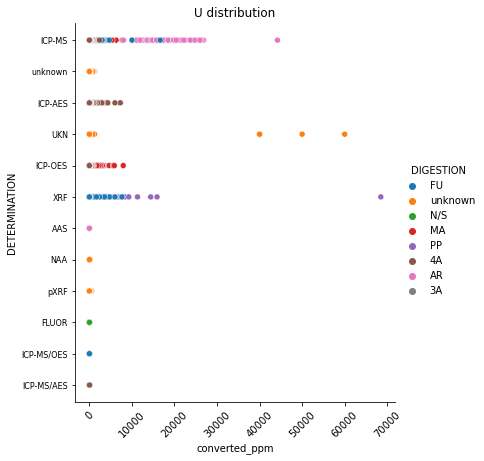

In [25]:
plt.figure()
sns.relplot(x='converted_ppm', y='DETERMINATION', hue='DIGESTION', height=6, data=U)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.title('U distribution')
plt.show()

In [26]:
U[U.converted_ppm > 20000]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
20494,1814750,DC,261173.0,108.0,108.4,1399604,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",U,68500.00,ppm,XRF1,0,68500.0,XRF,PP,unknown
181109,975532,CT,210780.0,0.0,10.0,590456,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.69,%,B/MS,0,26900.0,ICP-MS,AR,unknown
181110,975533,CT,210780.0,10.0,20.0,590457,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,4.42,%,B/MS,0,44200.0,ICP-MS,AR,unknown
181111,975534,CT,210780.0,20.0,30.0,590458,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.67,%,B/MS,0,26700.0,ICP-MS,AR,unknown
181112,975535,CT,210780.0,30.0,40.0,590459,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.24,%,B/MS,0,22400.0,ICP-MS,AR,unknown
181113,975536,CT,210780.0,40.0,50.0,590460,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.08,%,B/MS,0,20800.0,ICP-MS,AR,unknown
181115,975541,CT,210780.0,90.0,100.0,590465,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.02,%,B/MS,0,20200.0,ICP-MS,AR,unknown
181116,975538,CT,210780.0,60.0,70.0,590462,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.26,%,B/MS,0,22600.0,ICP-MS,AR,unknown
181117,975539,CT,210780.0,70.0,80.0,590463,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.19,%,B/MS,0,21900.0,ICP-MS,AR,unknown
181118,975540,CT,210780.0,80.0,90.0,590464,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.13,%,B/MS,0,21300.0,ICP-MS,AR,unknown


In [27]:
pd.set_option('max_rows', 70)
U[(U.UNIT == '%') & (U.VALUE > 0.01) & (U.DETERMINATION != 'UKN') & (U.DETERMINATION != 'pXRF')]


,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
181109,975532,CT,210780.0,0.0,10.0,590456,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.69,%,B/MS,0,26900.0,ICP-MS,AR,unknown
181110,975533,CT,210780.0,10.0,20.0,590457,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,4.42,%,B/MS,0,44200.0,ICP-MS,AR,unknown
181111,975534,CT,210780.0,20.0,30.0,590458,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.67,%,B/MS,0,26700.0,ICP-MS,AR,unknown
181112,975535,CT,210780.0,30.0,40.0,590459,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.24,%,B/MS,0,22400.0,ICP-MS,AR,unknown
181113,975536,CT,210780.0,40.0,50.0,590460,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.08,%,B/MS,0,20800.0,ICP-MS,AR,unknown
181114,975537,CT,210780.0,50.0,60.0,590461,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,1.85,%,B/MS,0,18500.0,ICP-MS,AR,unknown
181115,975541,CT,210780.0,90.0,100.0,590465,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.02,%,B/MS,0,20200.0,ICP-MS,AR,unknown
181116,975538,CT,210780.0,60.0,70.0,590462,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.26,%,B/MS,0,22600.0,ICP-MS,AR,unknown
181117,975539,CT,210780.0,70.0,80.0,590463,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.19,%,B/MS,0,21900.0,ICP-MS,AR,unknown
181118,975540,CT,210780.0,80.0,90.0,590464,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",U,2.13,%,B/MS,0,21300.0,ICP-MS,AR,unknown


## Zn

Most of this data looks OK except for a bunch of XRF analyses done by ME-XRF11s/b Iron ores by fusion/XRF analyses by Western Plains Resources at Hawkes Nest and Royal Resources in Olary. They are all from a series of 3 drill holes 302385 (Western Plains) , 302386 and 302387. Reviewing the original Western Plains data, this holes report anomalously high values, mostly over 100%, significantly different than all the other data reported in the same report. This has either been reported incorrectly or is a lab issue. Zn for these holes should be excluded.

Reviewing the data for the 2 Royal Resources data, for these 2 drill holes the data has been shifted accross 2 cells, so all these data points are out of whack. This needs to be corrected in the DB. This data is incorrect 

<Figure size 432x288 with 0 Axes>

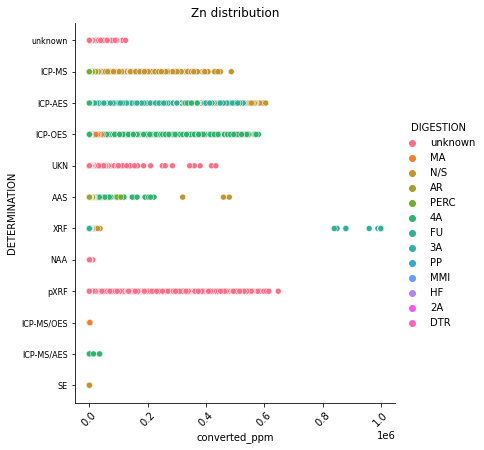

In [28]:
plt.figure()
sns.relplot(x='converted_ppm', y='DETERMINATION', hue='DIGESTION', height=6, data=Zn)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.title('Zn distribution')
plt.show()

In [29]:
pd.set_option('max_rows', 215)
Zn[Zn.converted_ppm > 800000]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
529716,2454373,CT,302385.0,78.00,80.00,1984751,GEOCHEMISTRY,"ALS Chemex, Perth WA",Zn,100.00,%,ME-XRF11s,0,1000000.0,XRF,FU,unknown
529717,2454374,CT,302385.0,80.00,82.00,1984752,GEOCHEMISTRY,"ALS Chemex, Perth WA",Zn,100.00,%,ME-XRF11s,0,1000000.0,XRF,FU,unknown
529718,2454375,CT,302385.0,82.00,84.00,1984753,GEOCHEMISTRY,"ALS Chemex, Perth WA",Zn,100.00,%,ME-XRF11s,0,1000000.0,XRF,FU,unknown
529719,2454378,CT,302385.0,88.00,90.00,1984756,GEOCHEMISTRY,"ALS Chemex, Perth WA",Zn,100.00,%,ME-XRF11s,0,1000000.0,XRF,FU,unknown
529720,2454376,CT,302385.0,84.00,86.00,1984754,GEOCHEMISTRY,"ALS Chemex, Perth WA",Zn,100.00,%,ME-XRF11s,0,1000000.0,XRF,FU,unknown
529721,2454377,CT,302385.0,86.00,88.00,1984755,GEOCHEMISTRY,"ALS Chemex, Perth WA",Zn,100.00,%,ME-XRF11s,0,1000000.0,XRF,FU,unknown
529722,2454379,CT,302385.0,90.00,92.00,1984757,GEOCHEMISTRY,"ALS Chemex, Perth WA",Zn,100.00,%,ME-XRF11s,0,1000000.0,XRF,FU,unknown
529723,2454380,CT,302385.0,92.00,94.00,1984758,GEOCHEMISTRY,"ALS Chemex, Perth WA",Zn,85.00,%,ME-XRF11s,0,850000.0,XRF,FU,unknown
529724,2454381,CT,302385.0,94.00,96.00,1984759,GEOCHEMISTRY,"ALS Chemex, Perth WA",Zn,88.00,%,ME-XRF11s,0,880000.0,XRF,FU,unknown
529725,2454382,CT,302385.0,96.00,98.00,1984760,GEOCHEMISTRY,"ALS Chemex, Perth WA",Zn,100.00,%,ME-XRF11s,0,1000000.0,XRF,FU,unknown


## Fe

86% sample from Aberfoyle resources, logged as iron stone, could be legit?

85.9% sample, inhouse by BHP XRF at the middlebacks in 1997, could be legit, may be pXRF data similar to other reported values like sample 2045320 also BHP at the middlebacks.

Other pXRF here is Lincoln Minerals

In [30]:
Fe = Fe.append(FeO)
Fe = Fe.append(Fe2O3)

<Figure size 432x288 with 0 Axes>

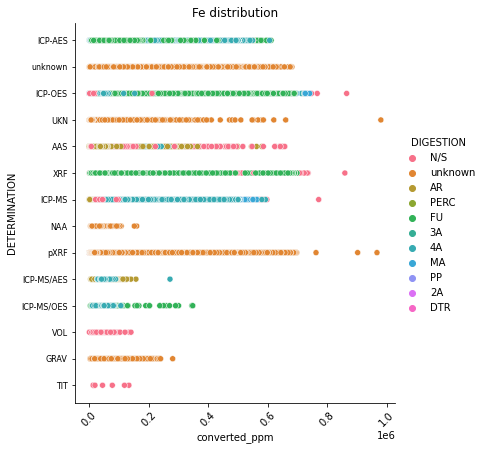

In [31]:
plt.figure()
sns.relplot(x='converted_ppm', y='DETERMINATION', hue='DIGESTION', height=6, data=Fe)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.title('Fe distribution')
plt.show()

In [32]:
Fe[Fe.converted_ppm > 800000]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
15547,1082952,INT,217656.0,40.0,42.0,691993,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Fe,865000.0,ppm,ICP-OES,0,865000.0,ICP-OES,N/S,unknown
32357,1793426,CT,258635.0,0.0,2.0,1379945,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Fe,98.0,%,UKN,0,980000.0,UKN,unknown,unknown
260595,2050653,CT,277612.0,4.0,6.0,1614617,GEOCHEMISTRY,In-house determinations by originating explora...,Fe,85.9,%,XRF,0,859000.0,XRF,N/S,unknown
287120,1854629,DC,264460.0,236.7,239.4,1429452,GEOCHEMISTRY,In-house determinations by originating explora...,Fe,96.7,%,XRFNiton,0,967000.0,pXRF,unknown,unknown
376895,2045320,CT,277278.0,28.0,30.0,1609572,GEOCHEMISTRY,In-house determinations by originating explora...,Fe,90.2,%,XRFInnovX,0,902000.0,pXRF,unknown,unknown


## Cu

First few are Rex Mins using IC3M, look legit. As is last one using ME-XRF21n

DH 141108, 141122, 141115, 141127, 143535 are a western mining holes on Yorke Pen, look like legit

Cu values and data all look OK

<Figure size 432x288 with 0 Axes>

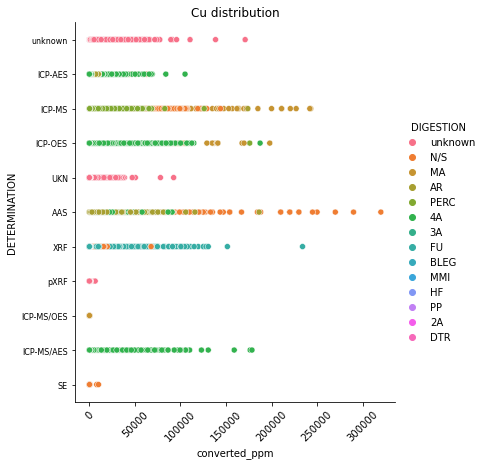

In [33]:
plt.figure()
sns.relplot(x='converted_ppm', y='DETERMINATION', hue='DIGESTION', height=6, data=Cu)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.title('Cu distribution')
plt.show()

In [34]:
Cu[Cu.converted_ppm > 200000]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
61531,2216884,HCORE,293039.0,312.00,313.00,1753503,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Cu,211000.0,ppm,IC3M,0,211000.0,ICP-MS,MA,unknown
63717,2213987,HCORE,293022.0,257.00,258.00,1750606,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Cu,220600.0,ppm,IC3M,0,220600.0,ICP-MS,MA,unknown
139969,2292776,HCORE,293482.0,152.00,153.00,1829193,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Cu,211000.0,ppm,IC3M,0,211000.0,ICP-MS,MA,unknown
145615,2301373,CT,293528.0,98.00,99.00,1837790,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Cu,227000.0,ppm,IC3M,0,227000.0,ICP-MS,MA,unknown
145617,2301371,CT,293528.0,96.00,97.00,1837788,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Cu,243000.0,ppm,IC3M,0,243000.0,ICP-MS,MA,unknown
145618,2301372,CT,293528.0,97.00,98.00,1837789,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Cu,242000.0,ppm,IC3M,0,242000.0,ICP-MS,MA,unknown
177500,101865,DC,141108.0,36.20,36.50,76946,GEOCHEMISTRY,NaN,Cu,230000.0,ppm,AAS,0,230000.0,AAS,N/S,unknown
177501,101866,DC,141108.0,36.50,37.00,76947,GEOCHEMISTRY,NaN,Cu,220000.0,ppm,AAS,0,220000.0,AAS,N/S,unknown
177502,101867,DC,141108.0,37.00,37.50,76948,GEOCHEMISTRY,NaN,Cu,250000.0,ppm,AAS,0,250000.0,AAS,N/S,unknown
177503,101868,DC,141108.0,37.50,38.00,76949,GEOCHEMISTRY,NaN,Cu,230000.0,ppm,AAS,0,230000.0,AAS,N/S,unknown


## Li

Loking at values over 500ppm. DH 268238 & 268311 is Monax Punt Hill prospect logged in scarn and metased respectively. Sample 2071557 is a Rio hole at kapunda Jones Hill Talc prospect, logged in a Clay unit. These values could be legit. Exclude the unknown values by SPECTRO method, looks like low precision method but unsure of how it compares with the other methods. 

<Figure size 432x288 with 0 Axes>

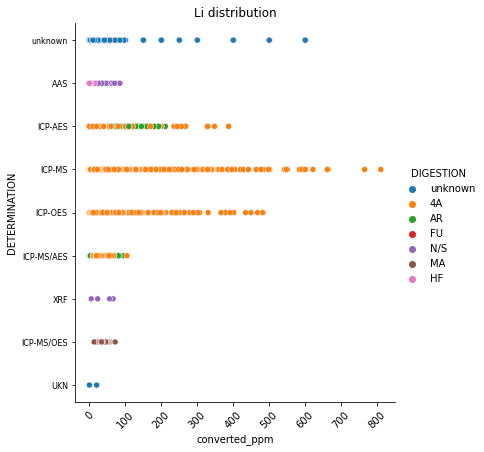

In [35]:
plt.figure()
sns.relplot(x='converted_ppm', y='DETERMINATION', hue='DIGESTION', height=6, data=Li)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.title('Li distribution')
plt.show()

In [36]:
Li[Li.converted_ppm > 500]

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
3089,2071557,HCORE,239693.0,81.00,82.30,1629939,GEOCHEMISTRY,"Ultra Trace Pty Ltd, Canning Vale W.A.",Li,550.0,ppm,ICP302,0,550.0,ICP-MS,MA,unknown
19428,34879,DC,78362.0,0.00,6.10,96689,GEOCHEMISTRY,NaN,Li,600.0,ppm,SPECTRO,0,600.0,unknown,unknown,unknown
19429,34880,DC,78362.0,6.10,12.19,96690,GEOCHEMISTRY,NaN,Li,600.0,ppm,SPECTRO,0,600.0,unknown,unknown,unknown
19432,34883,DC,78362.0,24.38,30.48,96693,GEOCHEMISTRY,NaN,Li,600.0,ppm,SPECTRO,0,600.0,unknown,unknown,unknown
19433,34884,DC,78362.0,30.48,36.58,96694,GEOCHEMISTRY,NaN,Li,600.0,ppm,SPECTRO,0,600.0,unknown,unknown,unknown
19434,34885,DC,78362.0,36.58,42.67,96695,GEOCHEMISTRY,NaN,Li,600.0,ppm,SPECTRO,0,600.0,unknown,unknown,unknown
57808,1931479,DC,268238.0,976.00,977.00,1506419,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Li,501.3,ppm,AT/MS,0,501.3,ICP-MS,4A,unknown
57818,1931489,DC,268238.0,986.00,987.00,1506429,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Li,583.6,ppm,AT/MS,0,583.6,ICP-MS,4A,unknown
57820,1931491,DC,268238.0,988.00,989.00,1506431,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Li,621.3,ppm,AT/MS,0,621.3,ICP-MS,4A,unknown
57821,1931492,DC,268238.0,989.00,990.00,1506432,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Li,594.4,ppm,AT/MS,0,594.4,ICP-MS,4A,unknown
